In [36]:
import numpy as np
import pickle

In [37]:
with open('/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen/figures/NIH/UMAPs/MULTIPLE_MARKERS/batch1_batch2_batch3_all_reps_WT_Untreated_without_CD41_colored_by_MARKERS/umap1_plot_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [38]:
umap_embeddings = data['umap_embeddings']
labels = data['label_data']

umap_embeddings.shape, labels.shape

((296776, 2), (296776,))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# umap_emb: (N, 2) array
# labels: (N,) array of true labels

db = DBSCAN(eps=0.5, min_samples=450).fit(umap_embeddings)
clusters = db.labels_

df = pd.DataFrame({
    "label": labels,
    "cluster": clusters
})

df = df[df["cluster"] != -1]  # Remove noise points

# Precompute cluster sizes from DBSCAN
cluster_sizes = df["cluster"].value_counts().to_dict()

results = []
for lbl in df["label"].unique():
    sub = df[df["label"] == lbl]
    for c in sub["cluster"].unique():
        cluster_members = df[df["cluster"] == c]
        label_count = (cluster_members["label"] == lbl).sum()
        cluster_size = cluster_sizes[c]

        composition = cluster_members["label"].value_counts(normalize=True)
        if len(composition) == 1:
            status = "standalone"
        else:
            others = [lab for lab in composition.index if lab != lbl]
            status = f"shared_with_{'_'.join(map(str, others))}"

        results.append((lbl, c, status, label_count, cluster_size))

summary = pd.DataFrame(
results,
columns=["label", "cluster", "status", "n_points_label", "cluster_size"]
)
summary


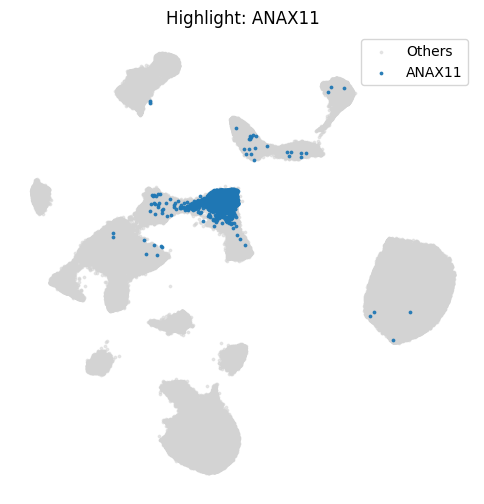

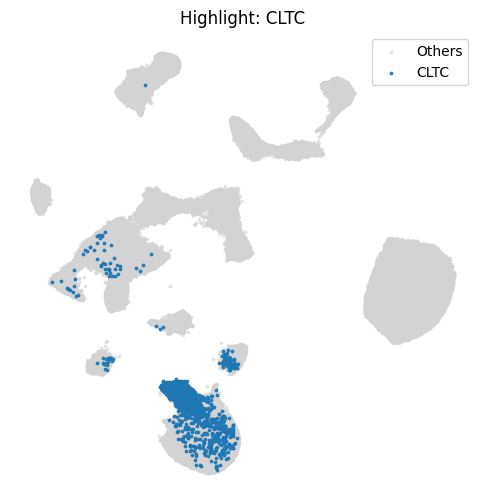

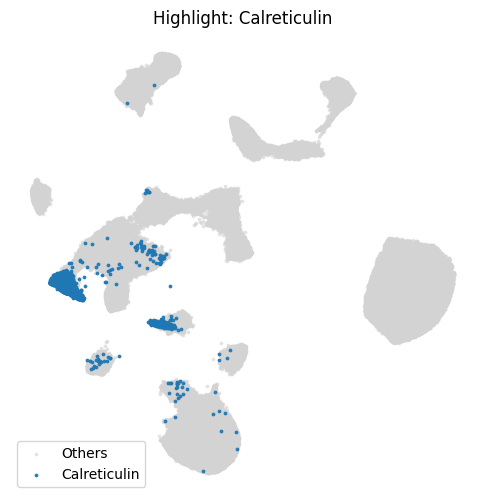

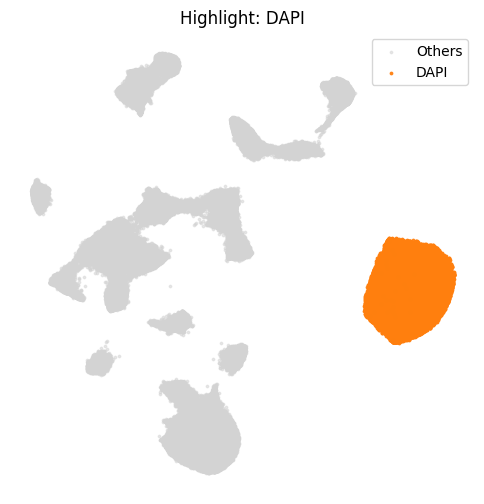

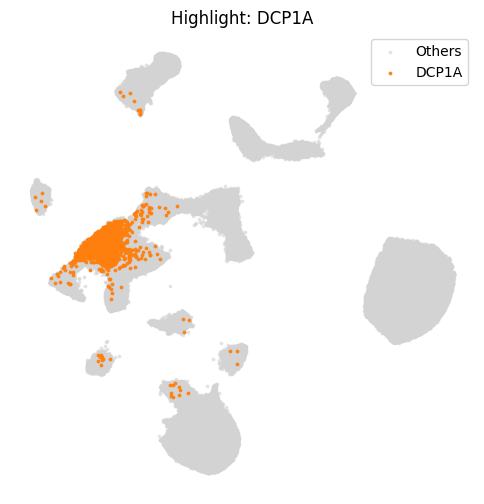

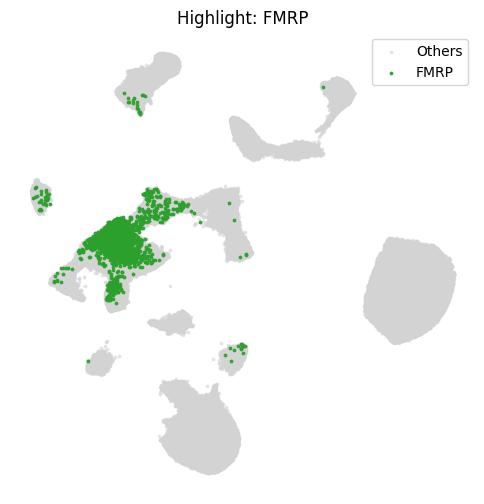

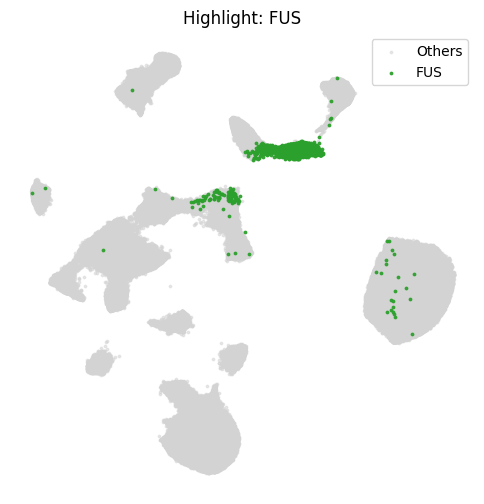

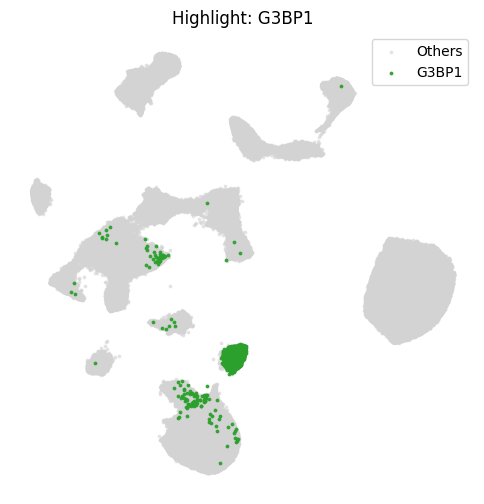

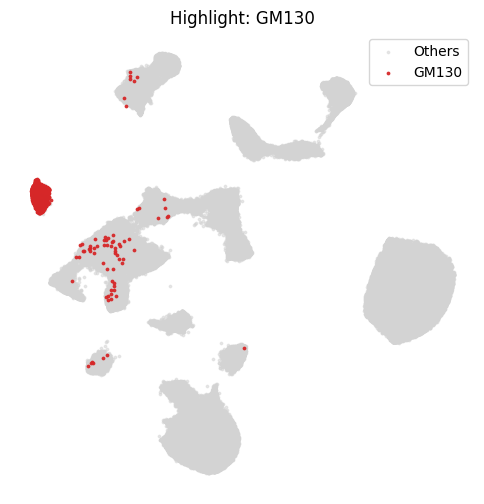

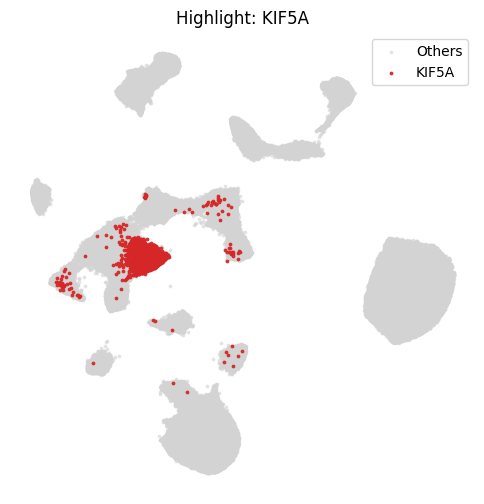

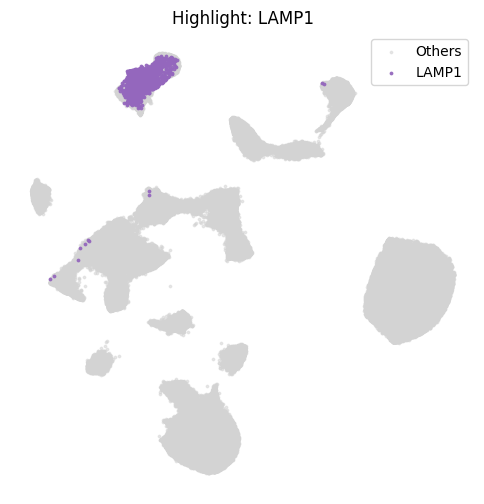

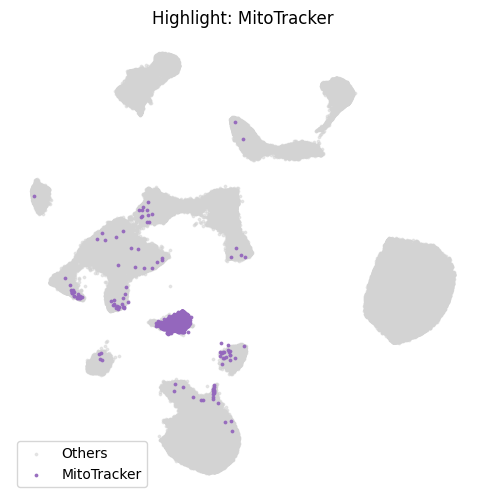

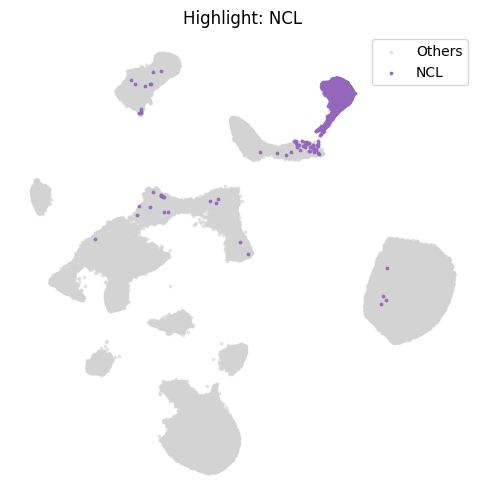

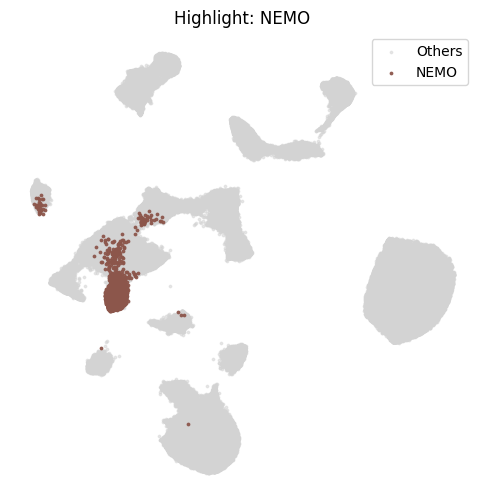

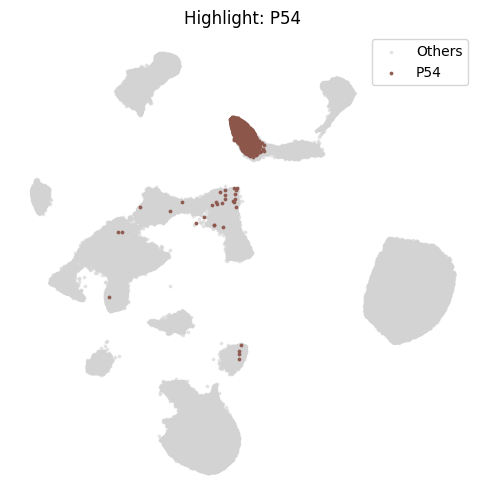

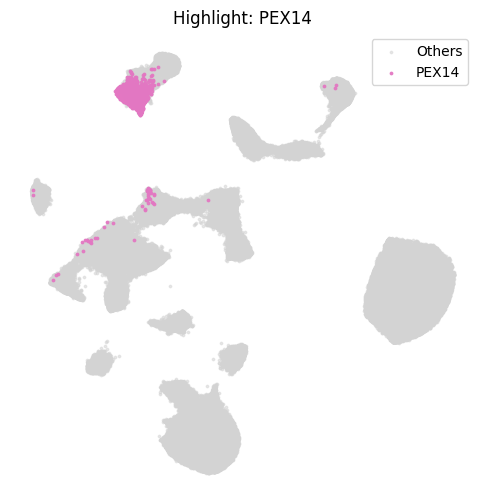

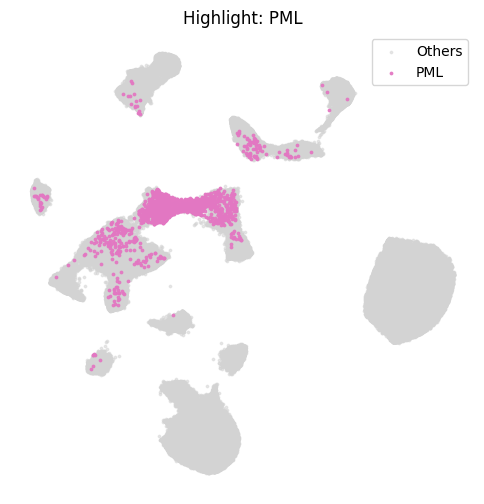

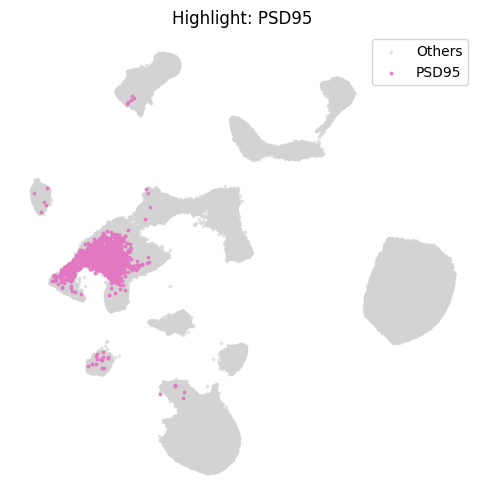

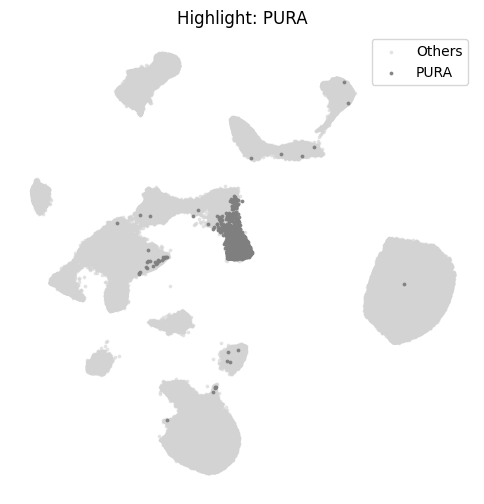

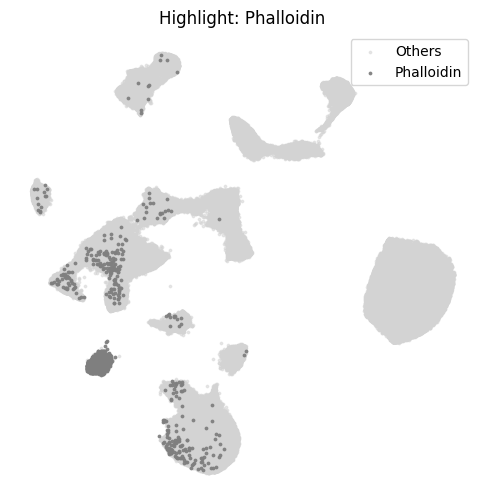

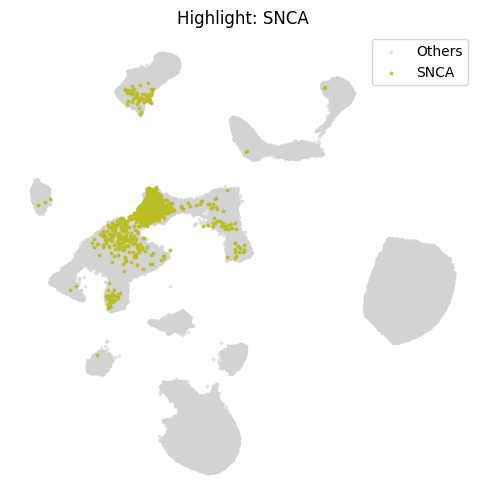

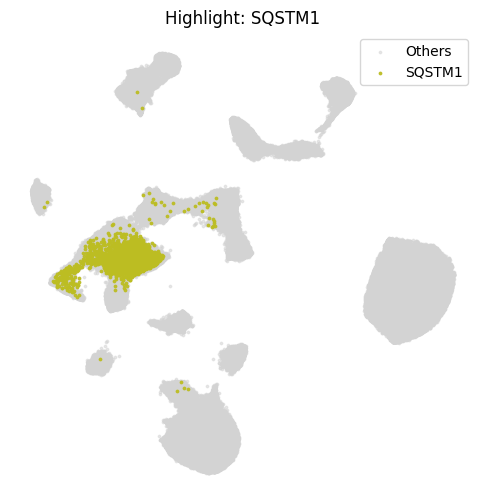

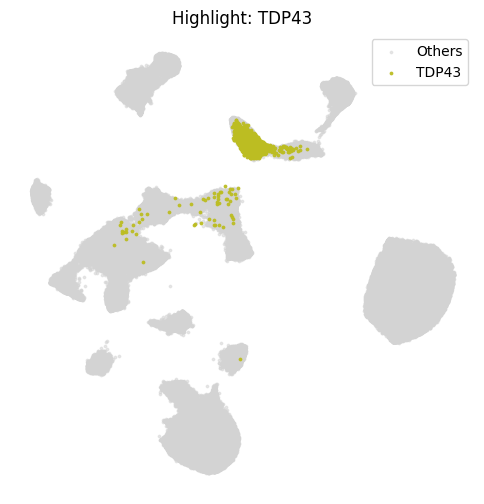

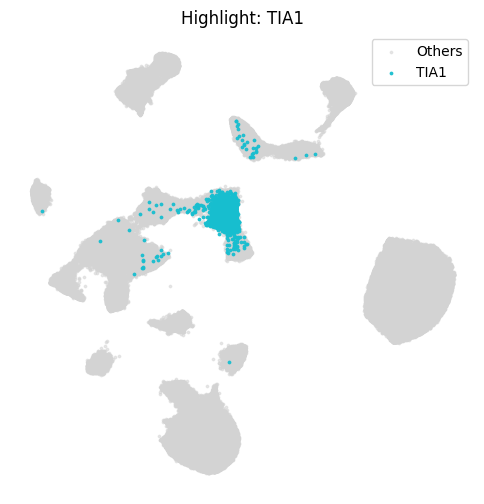

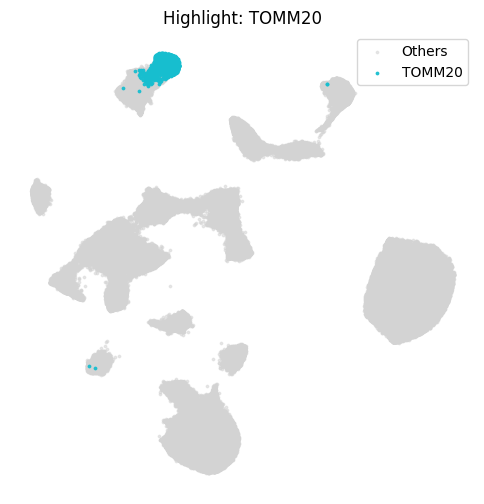

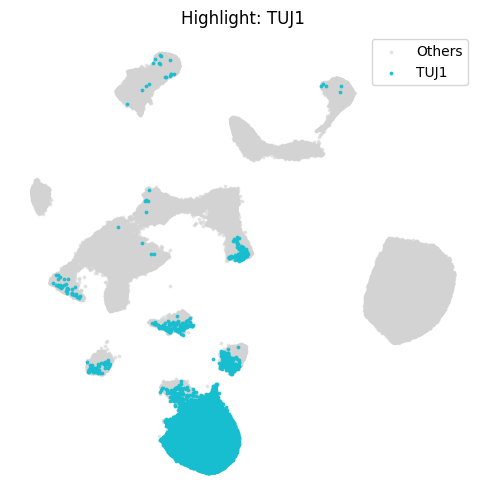

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def plot_umap_highlight(umap_emb, labels, figsize=(6, 6), cmap="tab10"):
    """
    Plot UMAP embeddings multiple times.
    Each plot highlights one label in color while others are shown in gray.
    
    Args:
        umap_emb: np.ndarray of shape (N, 2) - UMAP embedding
        labels: array-like of shape (N,) - true labels
        figsize: tuple - size of each plot
        cmap: str - colormap for highlighted labels
    """
    umap_emb = np.array(umap_emb)
    labels = np.array(labels)
    unique_labels = np.unique(labels)

    # assign a unique color to each label
    colors = plt.cm.get_cmap(cmap, len(unique_labels))

    for i, lbl in enumerate(unique_labels):
        plt.figure(figsize=figsize)

        # mask for this label
        mask = labels == lbl

        # plot all other labels in gray
        plt.scatter(
            umap_emb[~mask, 0], umap_emb[~mask, 1],
            c="lightgray", s=3, alpha=0.5, label="Others"
        )

        # plot the highlighted label in color
        plt.scatter(
            umap_emb[mask, 0], umap_emb[mask, 1],
            c=[colors(i)], s=3, alpha=0.9, label=str(lbl)
        )

        plt.title(f"Highlight: {lbl}")
        plt.legend()
        plt.axis("off")
        plt.show()


plot_umap_highlight(umap_embeddings, labels)